   message  statusCode  returnCode        date        datetime range  \
0     None         200           0  2023/06/18  2023.06.18.(일)         
1     None         200           0  2023/06/19  2023.06.19.(월)         
2     None         200           0  2023/06/20  2023.06.20.(화)         
3     None         200           0  2023/06/21  2023.06.21.(수)         
4     None         200           0  2023/06/22  2023.06.22.(목)         
5     None         200           0  2023/06/23  2023.06.23.(금)         
6     None         200           0  2023/06/24  2023.06.24.(토)         
7     None         200           0  2023/06/25  2023.06.25.(일)         
8     None         200           0  2023/06/26  2023.06.26.(월)         
9     None         200           0  2023/06/27  2023.06.27.(화)         
10    None         200           0  2023/06/28  2023.06.28.(수)         
11    None         200           0  2023/06/29  2023.06.29.(목)         

                                                ranks  
0   [{'

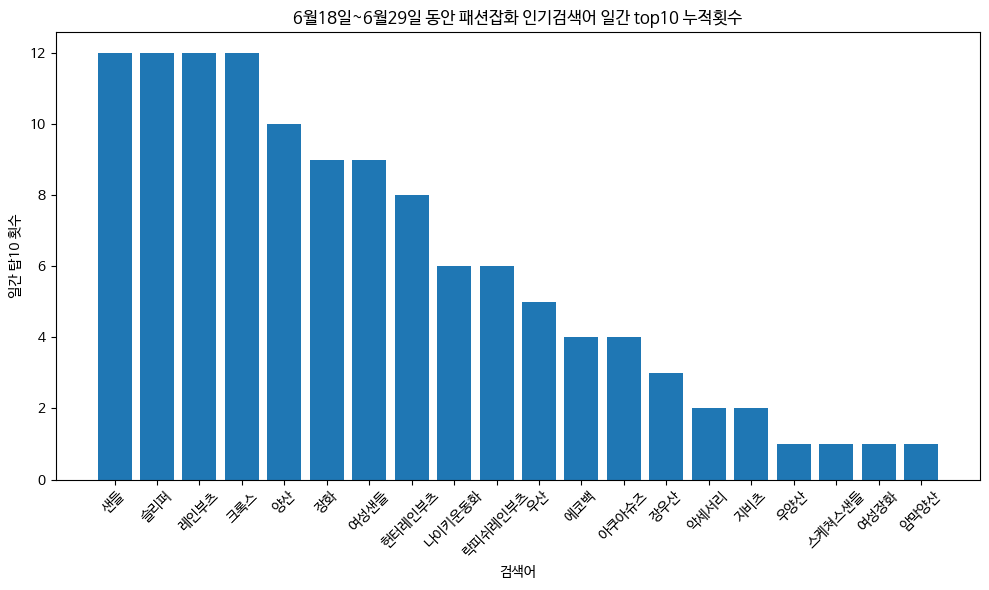

In [21]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import json



url = 'https://datalab.naver.com/shoppingInsight/getKeywordRank.naver?timeUnit=date&cid=50000001'
header = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'referer': 'https://datalab.naver.com/'
}

response = requests.post(url, headers=header)

data = json.loads(response.text)

df = pd.DataFrame(data)

#csv로 만들기
df.to_csv('키워드_검색_횟수.csv', index=False, encoding="cp949")


import csv
import ast
table_data = []



print(df)
df.info()
df.head()



# CSV에서 읽어오깅. 이러면 만들자마자 불러오는거니까.. 이거 하나로 끝~?
with open('키워드_검색_횟수.csv', 'r', encoding="cp949") as file:
    reader = csv.DictReader(file)
    for row in reader:
        date = row['date']
        ranks = ast.literal_eval(row['ranks'])
        for rank_info in ranks:
            rank = rank_info['rank']
            keyword = rank_info['keyword']
            table_data.append({'Date': date, 'Rank': rank, 'Keyword': keyword})


df = pd.DataFrame(table_data)
print(df)
df.info()
df.head()

# 키워드별 검색 횟수
keyword_counts = df['Keyword'].value_counts().reset_index()
keyword_counts.columns = ['Keyword', 'Count']



import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


#그래프~~
keywords = keyword_counts['Keyword']
counts = keyword_counts['Count']


plt.figure(figsize=(10, 6))
plt.bar(keywords, counts)
plt.xticks(rotation=45)
plt.xlabel('검색어')
plt.ylabel('일간 탑10 횟수')
plt.title('6월18일~6월29일 동안 패션잡화 인기검색어 일간 top10 누적횟수')
plt.tight_layout()


plt.show()


# 새 섹션